# Classical Time Series (TS) Forecasting Cont.


## Overview

1. **Tests**
    1. Granger’s Causality Test
    2. Cointegration Test
    

2. **Classical Forecasting Methods**
    * Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
    * Vector Autoregression (VAR)
    * Vector Autoregression Moving-Average (VARMA)
    * Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
    * Simple Exponential Smoothing (SES)
    * Holt Winter’s Exponential Smoothing (HWES)

## Tests

### A. Granger’s Causality Test

Let's use Granger's Causality Test to assess if each of the TS in the system influences each other. That is if it is possible to predict the series with past values of itself along with other series in the system. And we can test this relationship before even building the model.

Granger’s causality tests the null hypothesis that the coefficients of past values in the regression equation is zero.

That means that the past values of time series (X) do not cause the other series (Y). So if the p-value obtained from the test is lesser than the significance level of 0.05, then we can safely reject the null hypothesis.


### B. Cointegration Test

Cointegration test establishes the presence of a statistically significant connection between two or more time series.

When you have two or more time series and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated. (The order of integration(d) is the number of differencing required to make a non-stationary time series stationary.)

So when two or more time series are cointegrated it means they have a long run, statistically significant relationship.

### Load Basic Libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,pandas,skmultilearn -g

import os
import sys
import re
from tqdm import tqdm
import yaml
import watermark
from math import floor
from random import random
from pprint import pprint as pp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from pandas.plotting import register_matplotlib_converters    # for pandas_profiling

register_matplotlib_converters()                              # for pandas_profiling
sys.path.append(os.pardir)

CPython 3.7.3
IPython 7.5.0

numpy 1.16.4
pandas 0.24.2
skmultilearn unknown

compiler   : GCC 7.3.0
system     : Linux
release    : 5.0.0-23-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : d86a0b67678743daf3973137ff2eebe908c9c138


### Constants

In [2]:
INPUT_DATA = "../data/raw/wage_and_inflation.csv"

## Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

This is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (ex. as an AR, MA, etc. process).

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX by setting to zero the corresponding parameters.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# create data
data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]

# fit model
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# make prediction
exog2 = [200 + random()]
predictions = model_fit.predict(len(data1), len(data1), exog=[exog2])

### Vector Autoregression (VAR)
The **VAR** method is the generalization of AR to multiple parallel time series (ex. multivariate time series). It is used when two or more time series influence each other. This method models the next step in each time series using an AR model. We refer to this model as VAR(p).

1. You need atleast two time series (variables)
2. The time series should influence each other.

The method is suitable for multivariate time series without trend and seasonal components.

The main difference with other Autoregressive models like AR, ARMA or ARIMA is that these other models are uni-directional, the predictors influence the Y and not vice-versa. Whereas Vector Auto Regression (VAR) is bi-directional, that is the variables influence each other.

The AR(p) model equation looks like this:
\begin{equation*}
Y_{t} ​​=​​\alpha ​​+​​ \beta_1​Y_{t-1} ​​+​​ \beta_2​Y_{t-2} ​​+​​...​​+​​ \beta_n​Y_{t-n}​​+​​ \epsilon_t​
\end{equation*}

In the VAR model each variable is modeled as a linear combination of past values of itself and the past values of other variables in the system. Since you have multiple time series that influence each other, it is modeled as a system of equations with one equation per variable (time series).

\begin{equation*}
Y_{1,t} ​​=​​\alpha_1 ​​+​​ \beta_{11,1}​Y_{1,t-1} ​​+​​ \beta_{12,1}​Y_{2,t-1} ​​+​​ \epsilon_{1,t}​
\end{equation*}

\begin{equation*}
Y_{2,t} ​​=​​\alpha_2 ​​+​​ \beta_{21,1}​Y_{1,t-1} ​​+​​ \beta_{22,1}​Y_{2,t-1} ​​+​​ \epsilon_{2,t}​
\end{equation*}

Where Y{1,t-1} and Y{2,t-1} are the first lag of time series Y1 and Y2 respectively.

In [4]:
from statsmodels.tsa.vector_ar.var_model import VAR

data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
    
# fit model
VAR_model = VAR(data)
VAR_results = VAR_model.fit()
# make prediction
predictions = VAR_results.forecast(VAR_results.y, steps=1)
print("VAR Model Prediction: %s" % predictions)

VAR Model Prediction: [[100.17987637 100.66928399]]


In [5]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

df = pd.read_csv(INPUT_DATA, parse_dates=['date'], index_col='date')

In [6]:
df.head()

,Real GNP,Potential Real GNP,Unit labor cost,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


With:
1. gdfco : Fixed weight deflator for personal consumption expenditure excluding food and energy.
2. gdf   : Fixed weight GNP deflator.
3. gdfim : Fixed weight import deflator.
4. gdfcf : Fixed weight deflator for food in personal consumption expenditure.
5. gdfce : Fixed weight deflator for energy in personal consumption expenditure.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 1959-01-01 to 1989-07-01
Data columns (total 8 columns):
Real GNP              123 non-null float64
Potential Real GNP    123 non-null float64
Unit labor cost       123 non-null float64
gdfco                 123 non-null float64
gdf                   123 non-null float64
gdfim                 123 non-null float64
gdfcf                 123 non-null float64
gdfce                 123 non-null float64
dtypes: float64(8)
memory usage: 8.6 KB


In [8]:
df.describe()

,Real GNP,Potential Real GNP,Unit labor cost,gdfco,gdf,gdfim,gdfcf,gdfce
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.00000
mean,2747.097561,2758.462602,98.286992,69.460163,68.497561,59.397561,66.262602,52.90813
std,702.442330,735.028679,47.743734,31.724996,30.188260,31.086507,31.640044,31.60064
min,1606.400000,1608.300000,47.500000,36.900000,37.400000,26.600000,32.200000,23.10000
25%,2223.750000,2095.150000,53.400000,41.000000,41.350000,29.250000,37.000000,24.95000
50%,2734.000000,2743.400000,81.500000,56.100000,56.400000,53.700000,58.500000,40.20000
75%,3213.200000,3388.000000,151.250000,97.250000,97.550000,95.750000,98.250000,91.15000
max,4162.900000,4068.400000,187.400000,137.200000,130.200000,111.100000,129.900000,104.50000


### TS Plot

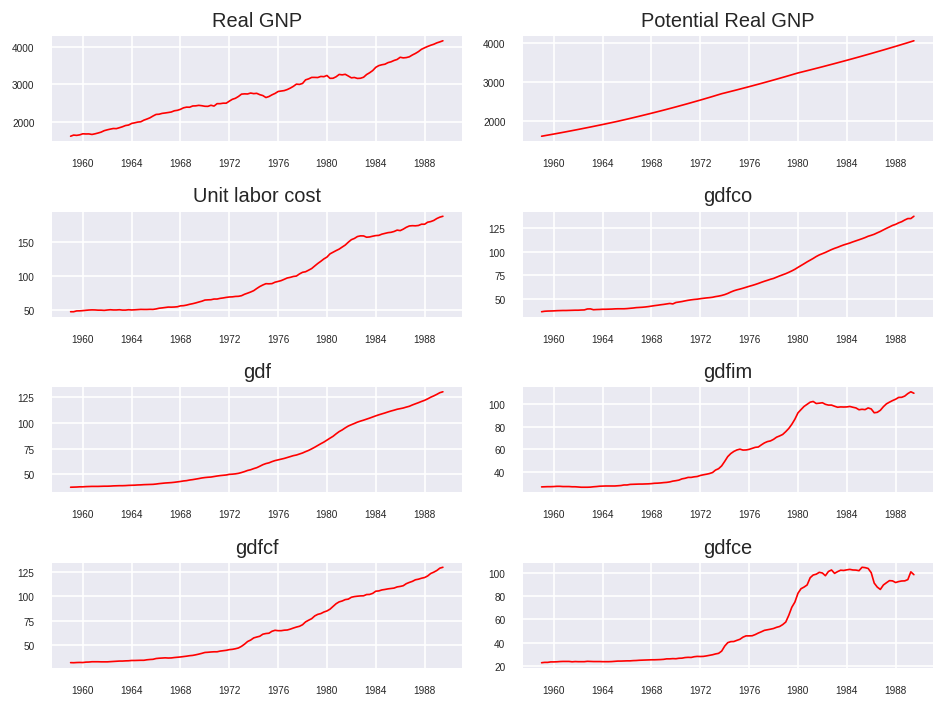

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(8,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

The series have a fairly similar trend patterns over the years except for gdfce and gdfim, where a different pattern is noticed starting in 1980.

### ***Granger’s Causality Test***

In [10]:
from statsmodels.tsa.stattools import grangercausalitytests
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns) 

,Real GNP_x,Potential Real GNP_x,Unit labor cost_x,gdfco_x,gdf_x,gdfim_x,gdfcf_x,gdfce_x
Real GNP_y,1.0000,0.0003,0.0001,0.0212,0.0014,0.0620,0.0001,0.0071
Potential Real GNP_y,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Unit labor cost_y,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000,0.0000,0.0041
gdfco_y,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
gdf_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
gdfim_y,0.0011,0.0067,0.0014,0.0083,0.0011,1.0000,0.0004,0.0000
gdfcf_y,0.0000,0.0000,0.0008,0.0008,0.0000,0.0038,1.0000,0.0009
gdfce_y,0.0025,0.0485,0.0000,0.0002,0.0000,0.0000,0.0000,1.0000


For example if we take the value 0.0212 in (row 1, column 4), it refers to the p-value of gdfco_x causing Real GNP_y. Any given p-value where significance level is <0.05, then the corresponding X series (column) causes the Y (row), so we can reject the null hypothesis and conclude that there is causality.

### ***Cointegration Test***

In [13]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

repl = {'Real GNP': 'R_GNP', 
        'Potential Real GNP': 'PR_GNP', 
        'Unit labor cost': 'ulc'}

df.columns = [k if (k not in repl.keys()) else repl[k] for k in df.columns]

def cointegration_test(df, alpha=0.05, verbose=True):
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]

    dfoutput = pd.DataFrame(zip(df.columns, traces, cvts, traces > cvts),
                            columns=['Name', 'Test Stat', '> C(95%)', 'Significance']).set_index("Name")
    if verbose:
        # Summary
        print(dfoutput)
        
    return dfoutput

cointegration_test(df, verbose=False)

,Test Stat,> C(95%),Significance
Name,,,
R_GNP,247.995468,143.6691,True
PR_GNP,183.117145,111.7797,True
ulc,130.014024,83.9383,True
gdfco,85.284827,60.0627,True
gdf,55.052297,40.1749,True
gdfim,31.588830,24.2761,True
gdfcf,14.057177,12.3212,True
gdfce,0.451320,4.1296,False


Split the data:

In [14]:
keep = 5
df_train, df_test = df[0:-keep], df[-keep:]

# Check size
print(df_train.shape)  # (118, 8)
print(df_test.shape)  # (5, 8)

(118, 8)
(5, 8)


#### Check for Stationarity and make TS Stationary

As from the previous notebook we have some tests that can help:
* Augmented Dickey-Fuller Test (ADF Test)
* KPSS test
* Philip-Perron test

### Vector Autoregression Moving-Average (VARMA)
**VARMA** models the next step in each time series using the ARMA model. It is the generalization of ARMA to multiple parallel time series (ex. multivariate time series).

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to a VARMA function, e.g. VARMA(p, q). A VARMA model can also be used to develop VAR or VMA models.

The method is suitable for multivariate time series without trend and seasonal components.

In [4]:
from statsmodels.tsa.statespace.varmax import VARMAX

data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = (v1, v2)
    data.append(row)
# fit model
VARMA_model = VARMAX(data, order=(1, 1))
VARMA_results = VARMA_model.fit(disp=False)
# make prediction
predictions = VARMA_results.forecast()
print("VARMA Model Prediction: %s" % predictions)

/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


VARMA Model Prediction: [[0.50161989 1.03910855]]


/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


### Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
**VARMAX** is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.

The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.

In [5]:
from statsmodels.tsa.statespace.varmax import VARMAX

data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [x + random() for x in range(100)]
# fit model
VARMAX_model = VARMAX(data, exog=data_exog, order=(1, 1))
VARMAX_results = VARMAX_model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
predictions = VARMAX_results.forecast(exog=data_exog2)
print("VARMAX Model Prediction: %s" % predictions)

/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


VARMAX Model Prediction: [[0.54121949 1.02204882]]


/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


### Simple Exponential Smoothing (SES)
**SES** models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components. We still have the seasonal component but let's apply it just to show what happens...

In [6]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

data = [x + random() for x in range(1, 100)]
# fit model
SES_model = SimpleExpSmoothing(data)
SES_results = SES_model.fit()
# make prediction
predictions = SES_results.predict(len(data), len(data))
print("SES Model Prediction: %s" % predictions)

SES Model Prediction: [99.19452246]


### Holt Winter’s Exponential Smoothing (HWES)
**HWES** also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

Again, let's apply the method just to show the behaviour...

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = [x + random() for x in range(1, 100)]
HWES_model = ExponentialSmoothing(data)
HWES_results = HWES_model.fit()

# make prediction
predictions = HWES_results.predict(len(data), len(data))
print("HWES Model Prediction: %s" % predictions)

HWES Model Prediction: [99.79365766]
